**Data Visualization**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

**Features:**

In [ ]:
features = list()
with open("features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]    
print("Number of Features: {}".format(len(features)))
features

Number of Features: 561


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

**Activity Labels:**

In [ ]:
classes = list()
with open("activity_labels.txt") as g:
    classes = [line.split()[1] for line in g.readlines()]    
print("Number of classes: {}".format(len(classes)))
classes
activity_labels_df = pd.read_fwf("activity_labels.txt",header=None,sep=" ")
activity_labels_df.columns =['Class Number', 'Class Name']

print(activity_labels_df)

Number of classes: 6
   Class Number          Class Name
0             1             WALKING
1             2    WALKING_UPSTAIRS
2             3  WALKING_DOWNSTAIRS
3             4             SITTING
4             5            STANDING
5             6              LAYING


In [ ]:
x_train_df = pd.read_csv("train.csv")
y_train_df = pd.read_fwf("y_train.txt",header=None,sep=" ")
x_test_df = pd.read_csv("test.csv")
y_test_df = pd.read_fwf("y_test.txt",header=None,sep=" ")

**Number of Observations per User:**

[]

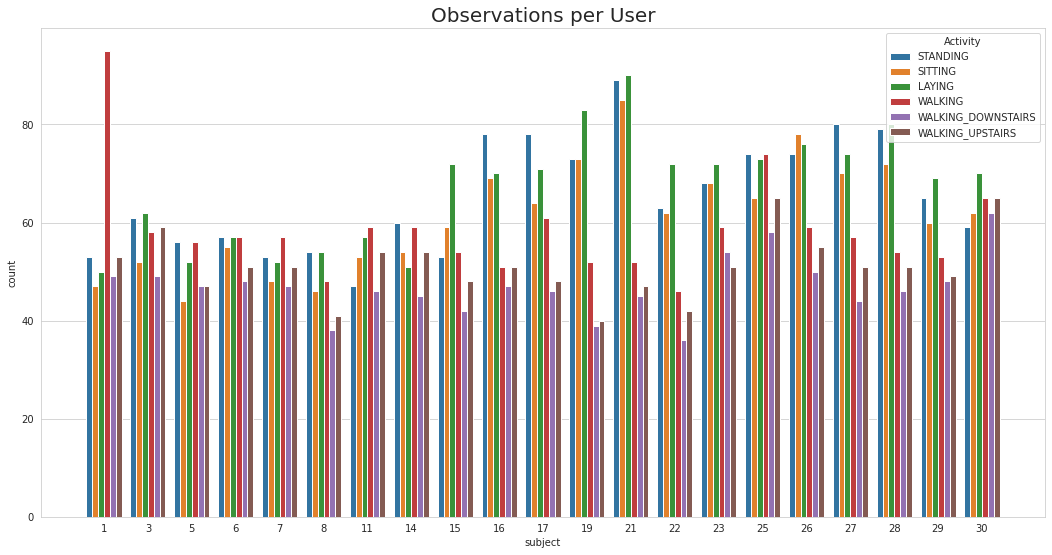

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
plt.title('Observations per User', fontsize=20)
sns.countplot(x='subject', hue='Activity', data=x_train_df)
plt.plot()
# There are a total of 30 users
# Plot of number of observations per user per activity

**Number of Observations per Activity:**

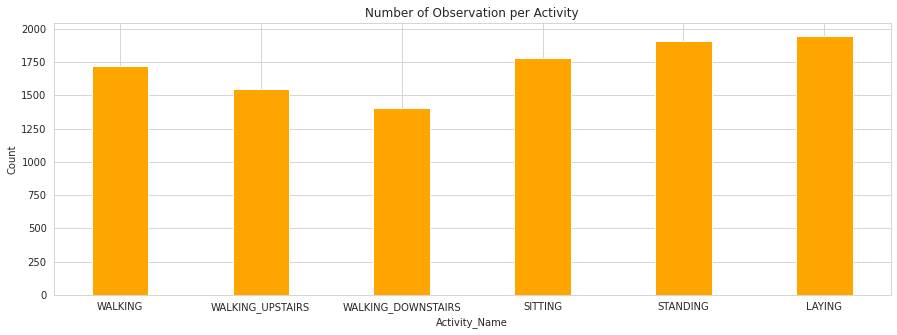

In [ ]:
Dict = {}
Dict[1] = 0
Dict[2] = 0
Dict[3] = 0
Dict[4] = 0
Dict[5] = 0
Dict[6] = 0
y_train_df = np.array(y_train_df)
# print(len(y_train_df))
for i in range(len(y_train_df)):
  if(y_train_df[i][0]==1):
    Dict[1] = Dict[1] + 1
  if(y_train_df[i][0]==2):
    Dict[2] = Dict[2] + 1
  if(y_train_df[i][0]==3):
    Dict[3] = Dict[3] + 1
  if(y_train_df[i][0]==4):
    Dict[4] = Dict[4] + 1
  if(y_train_df[i][0]==5):
    Dict[5] = Dict[5] + 1
  if(y_train_df[i][0]==6):
    Dict[6] = Dict[6] + 1
y_test_df = np.array(y_test_df)
# print(len(y_test_df))
for i in range(len(y_test_df)):
  if(y_test_df[i][0]==1):
    Dict[1] = Dict[1] + 1
  if(y_test_df[i][0]==2):
    Dict[2] = Dict[2] + 1
  if(y_test_df[i][0]==3):
    Dict[3] = Dict[3] + 1
  if(y_test_df[i][0]==4):
    Dict[4] = Dict[4] + 1
  if(y_test_df[i][0]==5):
    Dict[5] = Dict[5] + 1
  if(y_test_df[i][0]==6):
    Dict[6] = Dict[6] + 1
# print(Dict)
# plt.title('Number of Observation per Activity', fontsize=15)
x = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
y = []
for i in range(6):
  y.append(Dict[i+1])
fig = plt.figure(figsize = (15, 5))
plt.bar(x, y, color ='orange',width = 0.4)
plt.xlabel('Activity_Name')
plt.ylabel('Count')
plt.title("Number of Observation per Activity")
plt.show()
# This shows that there is no class imbalance problem.
# As the number of inputs are nearly same for each class.

**Checking Underfitting:**

In [ ]:
x_train_df.drop(x_train_df.iloc[:, 561:563], inplace = True, axis = 1)
x_train_df_tmp = x_train_df.copy()
y_train_df_tmp = y_train_df.copy()
x_train_df_tmp.drop(x_train_df_tmp.index[100:7000],0,inplace=True)
# print(x_train_df_tmp.shape)
# print(y_train_df_tmp.shape)
y_train_df_tmp = pd.DataFrame(y_train_df_tmp)
# y_test_df_tmp = pd.DataFrame(y_test_df_tmp)
y_train_df_tmp.drop(y_train_df_tmp.index[100:7000],0,inplace=True)
# print(y_train_df_tmp.shape)
x_test_df.drop(x_test_df.iloc[:, 561:563], inplace = True, axis = 1)
model = LogisticRegression(random_state=0, max_iter=10000).fit(x_train_df_tmp, y_train_df_tmp.values.ravel())
model.score(x_test_df, y_test_df)

0.7611129962673906

**Test Accuracy using Logistic Regression:**

In [ ]:
x_train_df.drop(x_train_df.iloc[:, 561:563], inplace = True, axis = 1)
print("Number of patterns in train data and number of features:")
print(x_train_df.shape)
y_train_df = pd.DataFrame(y_train_df)
y_test_df = pd.DataFrame(y_test_df)
model = LogisticRegression(random_state=0, max_iter=10000).fit(x_train_df, y_train_df.values.ravel())
x_test_df.drop(x_test_df.iloc[:, 561:563], inplace = True, axis = 1)
y_test_pred_df = model.predict(x_test_df)
print("Test accuracy using logistic regression :")
model.score(x_test_df, y_test_df)

Number of patterns in train data and number of features:
(7352, 561)
Test accuracy using logistic regression :


0.9613165931455717

**Implementing K-Fold Cross Validation for LR:**

Iteration :  1
Accuracy =  95.14563106796116
--------------
Iteration :  2
Accuracy =  92.96116504854369
--------------
Iteration :  3
Accuracy =  97.57281553398059
--------------
Iteration :  4
Accuracy =  97.03883495145631
--------------
Iteration :  5
Accuracy =  96.89169499757163
--------------
AVG Accuracy :  95.92202831990268


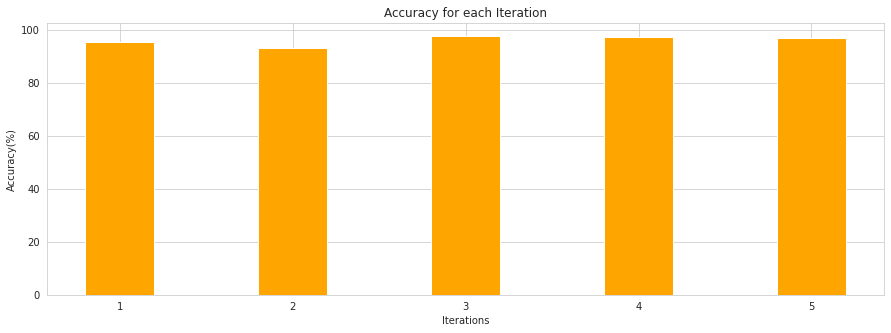

In [ ]:
kf = KFold(n_splits=5)
kf
x_df = x_train_df.append(x_test_df)
y_df = y_train_df.append(y_test_df)
# print(x_df.shape)
# print(y_df.shape)
total_df = pd.concat([x_df, y_df.reindex(x_df.index)], axis=1)
# print(df.shape)
avgAccuracy = 0
foldNum = 1
y = []
for train_index, test_index in kf.split(np.array(total_df.values)):
  trainDf = total_df.iloc[train_index]
  testDf = total_df.iloc[test_index]
  print('Iteration : ',foldNum)
  a = np.array(trainDf.values)
  X_train = a[:,0:(len(a[0])-1)]
  y_train = a[:,len(a[0])-1]
  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  model = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train.values.ravel())
  b = np.array(testDf.values)
  X_test = b[:,0:(len(b[0])-1)]
  y_test = b[:,len(b[0])-1]
  X_test = pd.DataFrame(X_test)
  y_test = pd.DataFrame(y_test)
  # model.score(X_test, y_test)
  print("Accuracy = ", model.score(X_test, y_test)*100)
  y.append(model.score(X_test, y_test)*100)
  avgAccuracy+= model.score(X_test, y_test)
  print('--------------')
  foldNum+= 1
avgAccuracy /= 5
print('AVG Accuracy : ',avgAccuracy*100)

x = [1, 2, 3, 4, 5]
fig = plt.figure(figsize = (15, 5))
plt.bar(x, y, color ='orange',width = 0.4)
plt.xlabel('Iterations')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy for each Iteration")
plt.show()

**Confusion Matrix:**

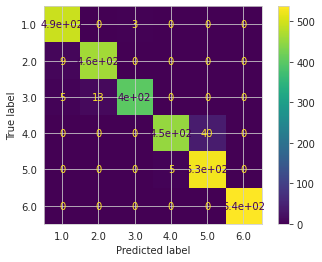

In [ ]:
plot_confusion_matrix(model, x_test_df, y_test_df)
plt.show()

**Class wise Accuracy:**

class:  Accuracy:
1       94.44444444444444
2       96.94989106753813
3       99.02439024390245
4       97.51693002257336
5       90.27777777777779
6       100.0


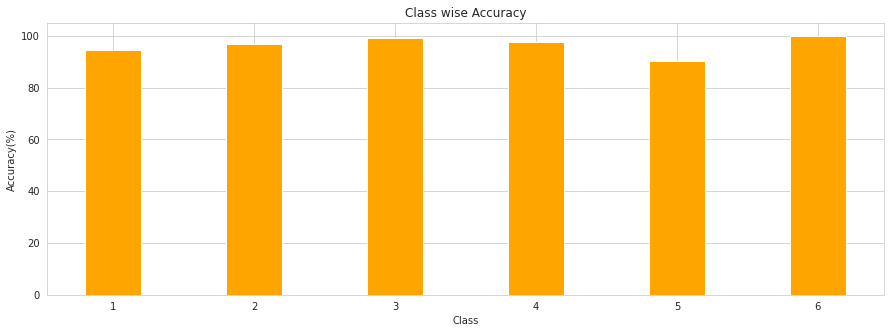

class:  Precision:
1       94.44444444444444
2       96.94989106753813
3       99.02439024390245
4       97.51693002257336
5       90.27777777777779
6       100.0
class:  Recall:
1       99.39516129032258
2       94.47983014861995
3       96.66666666666667
4       87.9837067209776
5       97.74436090225564
6       100.0


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_df, y_test_pred_df)
# cnf_matrix = cnf_matrix.astype(float)
# print(cnf_matrix)
class_accu_lr = []
c = 0
for i in range(len(cnf_matrix[0])):
  s = 0
  n = 0
  for j in range(len(cnf_matrix)):
    if(j==c):
      n = cnf_matrix[j][i]
    s = s + cnf_matrix[j][i]
  class_accu_lr.append((n/s)*100)
  c = c + 1
print("class:  Accuracy:")
for i in range(len(class_accu_lr)):
  print(i+1, "     ",class_accu_lr[i])
x = [1, 2, 3, 4, 5, 6]
fig = plt.figure(figsize = (15, 5))
plt.bar(x, class_accu_lr, color ='orange',width = 0.4)
plt.xlabel('Class')
plt.ylabel('Accuracy(%)')
plt.title("Class wise Accuracy")
plt.show()

precision = class_accu_lr.copy()
recall = []
c = 0
for i in range(len(cnf_matrix)):
  n = 0
  s = 0
  for j in range(len(cnf_matrix[0])):
    if(j==c):
      n = cnf_matrix[i][j]
    s = s + cnf_matrix[i][j]
  recall.append((n/s)*100)
  c = c + 1

print("class:  Precision:")
for i in range(len(precision)):
  print(i+1, "     ",precision[i])

print("class:  Recall:")
for i in range(len(recall)):
  print(i+1, "     ",recall[i])

**Test Accuracy using Multi Layer Perceptron(MLP):**

In [ ]:
mlp = MLPClassifier(max_iter=10000,hidden_layer_sizes=(1000,2000)).fit(x_train_df,y_train_df.values.ravel())
y_test_pred_df = mlp.predict(x_test_df)
print("Test Accuracy using MLP Classifier :", mlp.score(x_test_df,y_test_df))

Test Accuracy using MLP Classifier : 0.9518154054971157


**Implementing K-Fold Cross Validation for MLP:**

Iteration :  1
Accuracy =  94.07766990291262
--------------
Iteration :  2
Accuracy =  92.81553398058252
--------------
Iteration :  3
Accuracy =  97.76699029126213
--------------
Iteration :  4
Accuracy =  94.1747572815534
--------------
Iteration :  5
Accuracy =  95.6289460903351
--------------
AVG Accuracy :  94.89277950932916


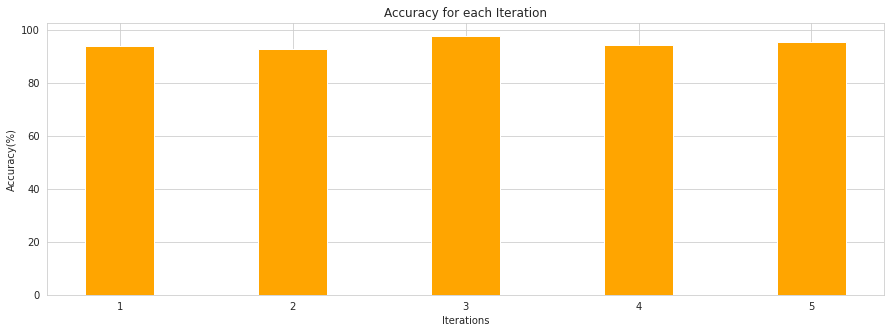

In [ ]:
kf = KFold(n_splits=5)
kf
x_df = x_train_df.append(x_test_df)
y_df = y_train_df.append(y_test_df)
# print(x_df.shape)
# print(y_df.shape)
total_df = pd.concat([x_df, y_df.reindex(x_df.index)], axis=1)
# print(df.shape)
avgAccuracy = 0
foldNum = 1
y = []
for train_index, test_index in kf.split(np.array(total_df.values)):
  trainDf = total_df.iloc[train_index]
  testDf = total_df.iloc[test_index]
  print('Iteration : ',foldNum)
  a = np.array(trainDf.values)
  X_train = a[:,0:(len(a[0])-1)]
  y_train = a[:,len(a[0])-1]
  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  mlp = MLPClassifier(max_iter=10000,hidden_layer_sizes=(1000,2000)).fit(X_train,y_train.values.ravel())
  b = np.array(testDf.values)
  X_test = b[:,0:(len(b[0])-1)]
  y_test = b[:,len(b[0])-1]
  X_test = pd.DataFrame(X_test)
  y_test = pd.DataFrame(y_test)
  # model.score(X_test, y_test)
  print("Accuracy = ", mlp.score(X_test, y_test)*100)
  y.append(mlp.score(X_test, y_test)*100)
  avgAccuracy+= mlp.score(X_test, y_test)
  print('--------------')
  foldNum+= 1
avgAccuracy /= 5
print('AVG Accuracy : ',avgAccuracy*100)

x = [1, 2, 3, 4, 5]
fig = plt.figure(figsize = (15, 5))
plt.bar(x, y, color ='orange',width = 0.4)
plt.xlabel('Iterations')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy for each Iteration")
plt.show()

**Confusion Matrix:**

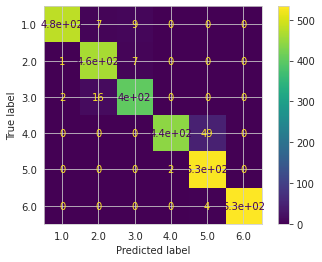

In [ ]:
plot_confusion_matrix(mlp, x_test_df, y_test_df)
plt.show()

**Class wise Accuracy:**

class:  Accuracy:
1       95.10763209393346
2       95.06437768240343
3       96.84466019417476
4       95.45454545454545
5       89.49211908931699
6       100.0


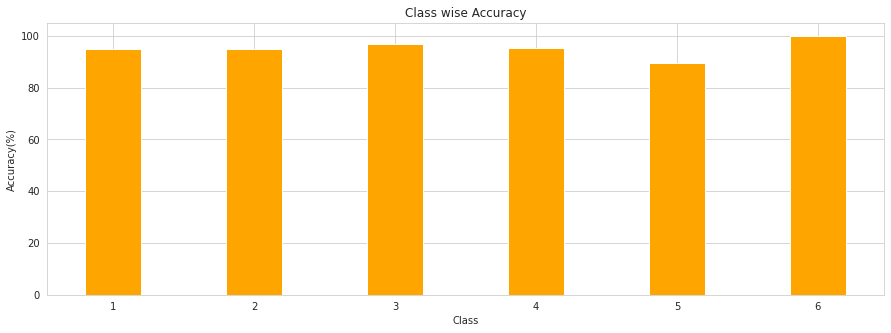

class:  Precision:
1       95.10763209393346
2       95.06437768240343
3       96.84466019417476
4       95.45454545454545
5       89.49211908931699
6       100.0
class:  Recall:
1       97.98387096774194
2       94.0552016985138
3       95.0
4       89.81670061099797
5       96.05263157894737
6       97.76536312849163


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_df, y_test_pred_df)
# cnf_matrix = cnf_matrix.astype(float)
# print(cnf_matrix)
class_accu_mlp = []
c = 0
for i in range(len(cnf_matrix[0])):
  s = 0
  n = 0
  for j in range(len(cnf_matrix)):
    if(j==c):
      n = cnf_matrix[j][i]
    s = s + cnf_matrix[j][i]
  class_accu_mlp.append((n/s)*100)
  c = c + 1
print("class:  Accuracy:")
for i in range(len(class_accu_mlp)):
  print(i+1, "     ",class_accu_mlp[i])
x = [1, 2, 3, 4, 5, 6]
fig = plt.figure(figsize = (15, 5))
plt.bar(x, class_accu_mlp, color ='orange',width = 0.4)
plt.xlabel('Class')
plt.ylabel('Accuracy(%)')
plt.title("Class wise Accuracy")
plt.show()

precision = class_accu_mlp.copy()
recall = []
c = 0
for i in range(len(cnf_matrix)):
  n = 0
  s = 0
  for j in range(len(cnf_matrix[0])):
    if(j==c):
      n = cnf_matrix[i][j]
    s = s + cnf_matrix[i][j]
  recall.append((n/s)*100)
  c = c + 1

print("class:  Precision:")
for i in range(len(precision)):
  print(i+1, "     ",precision[i])

print("class:  Recall:")
for i in range(len(recall)):
  print(i+1, "     ",recall[i])

**Test Accuracy using Single Layer Perceptron(SLP):**

In [ ]:
slp = MLPClassifier(max_iter=10000,hidden_layer_sizes=()).fit(x_train_df,y_train_df.values.ravel())
y_test_pred_df = slp.predict(x_test_df)
print("Test Accuracy using SLP Classifier :", slp.score(x_test_df,y_test_df))

Test Accuracy using SLP Classifier : 0.9545300305395318


**Implementing K-Fold Cross Validation for SLP:**

Iteration :  1
Accuracy =  94.6116504854369
--------------
Iteration :  2
Accuracy =  93.20388349514563
--------------
Iteration :  3
Accuracy =  97.81553398058253
--------------
Iteration :  4
Accuracy =  95.58252427184466
--------------
Iteration :  5
Accuracy =  96.01748421563866
--------------
AVG Accuracy :  95.44621528972968


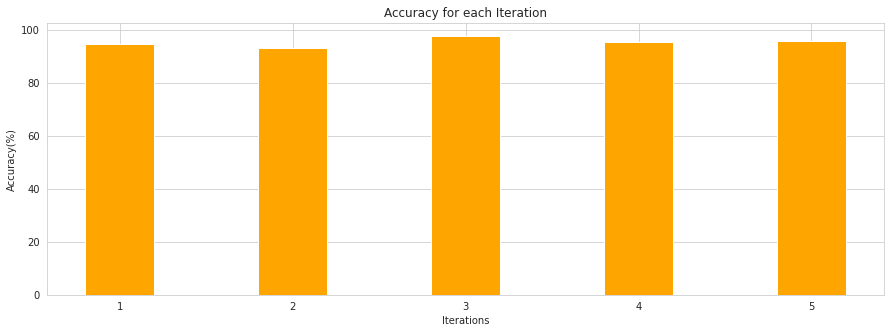

In [ ]:
kf = KFold(n_splits=5)
kf
x_df = x_train_df.append(x_test_df)
y_df = y_train_df.append(y_test_df)
# print(x_df.shape)
# print(y_df.shape)
total_df = pd.concat([x_df, y_df.reindex(x_df.index)], axis=1)
# print(df.shape)
avgAccuracy = 0
foldNum = 1
y = []
for train_index, test_index in kf.split(np.array(total_df.values)):
  trainDf = total_df.iloc[train_index]
  testDf = total_df.iloc[test_index]
  print('Iteration : ',foldNum)
  a = np.array(trainDf.values)
  X_train = a[:,0:(len(a[0])-1)]
  y_train = a[:,len(a[0])-1]
  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  slp = MLPClassifier(max_iter=10000,hidden_layer_sizes=()).fit(X_train,y_train.values.ravel())
  b = np.array(testDf.values)
  X_test = b[:,0:(len(b[0])-1)]
  y_test = b[:,len(b[0])-1]
  X_test = pd.DataFrame(X_test)
  y_test = pd.DataFrame(y_test)
  # model.score(X_test, y_test)
  print("Accuracy = ", slp.score(X_test, y_test)*100)
  y.append(slp.score(X_test, y_test)*100)
  avgAccuracy+= slp.score(X_test, y_test)
  print('--------------')
  foldNum+= 1
avgAccuracy /= 5
print('AVG Accuracy : ',avgAccuracy*100)

x = [1, 2, 3, 4, 5]
fig = plt.figure(figsize = (15, 5))
plt.bar(x, y, color ='orange',width = 0.4)
plt.xlabel('Iterations')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy for each Iteration")
plt.show()

**Confusion Matrix:**

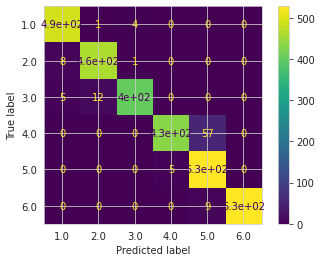

In [ ]:
plot_confusion_matrix(slp, x_test_df, y_test_df)
plt.show()

**Class wise Accuracy:**

class:  Accuracy:
1       94.07265774378585
2       96.29629629629629
3       99.01960784313727
4       94.20600858369099
5       90.17857142857143
6       100.0


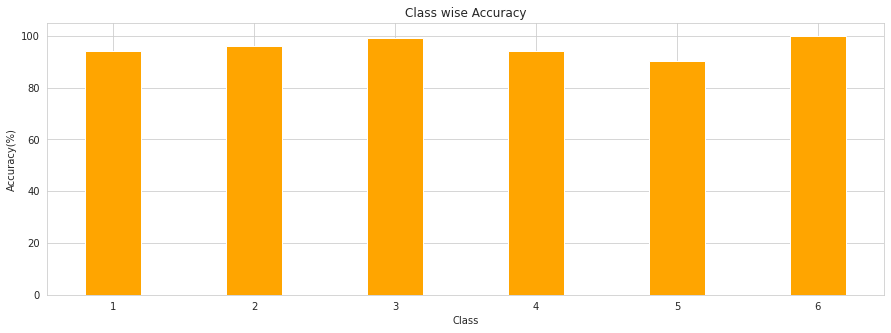

class:  Precision:
1       94.07265774378585
2       96.29629629629629
3       99.01960784313727
4       94.20600858369099
5       90.17857142857143
6       100.0
class:  Recall:
1       99.19354838709677
2       93.84288747346072
3       96.19047619047619
4       89.40936863543789
5       94.92481203007519
6       98.88268156424581


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_df, y_test_pred_df)
# cnf_matrix = cnf_matrix.astype(float)
# print(cnf_matrix)
class_accu_slp = []
c = 0
for i in range(len(cnf_matrix[0])):
  s = 0
  n = 0
  for j in range(len(cnf_matrix)):
    if(j==c):
      n = cnf_matrix[j][i]
    s = s + cnf_matrix[j][i]
  class_accu_slp.append((n/s)*100)
  c = c + 1
print("class:  Accuracy:")
for i in range(len(class_accu_slp)):
  print(i+1, "     ",class_accu_slp[i])
x = [1, 2, 3, 4, 5, 6]
fig = plt.figure(figsize = (15, 5))
plt.bar(x, class_accu_slp, color ='orange',width = 0.4)
plt.xlabel('Class')
plt.ylabel('Accuracy(%)')
plt.title("Class wise Accuracy")
plt.show()

precision = class_accu_slp.copy()
recall = []
c = 0
for i in range(len(cnf_matrix)):
  n = 0
  s = 0
  for j in range(len(cnf_matrix[0])):
    if(j==c):
      n = cnf_matrix[i][j]
    s = s + cnf_matrix[i][j]
  recall.append((n/s)*100)
  c = c + 1

print("class:  Precision:")
for i in range(len(precision)):
  print(i+1, "     ",precision[i])

print("class:  Recall:")
for i in range(len(recall)):
  print(i+1, "     ",recall[i])

**Comparing Accuracy using different training models:**

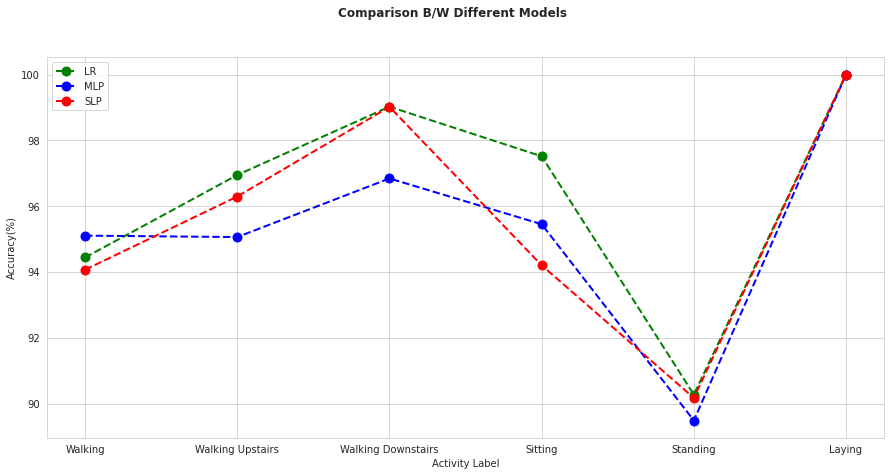

In [ ]:
x = ["Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying"]
fig = plt.figure(figsize = (15, 7))
fig.suptitle("Comparison B/W Different Models",fontweight='bold')
plt.plot(x, class_accu_lr, label = "LR",color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=9)
plt.plot(x, class_accu_mlp, label = "MLP",color='blue', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='blue', markersize=9)
plt.plot(x, class_accu_slp, label = "SLP",color='red', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='red', markersize=9)
plt.xlabel('Activity Label')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()